In [84]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

### Реализация метода Рунге-Кутты 4 порядка для первых 4 шагов метода Адамса-Башфорда 5 порядка(с расчетом производной по новому значению функции)

In [85]:
def rungeStep_for_adams_bashford(f, t, y0, tau, args):
    k1 = tau * f(t, y0, *args)
    k2 = tau * f(t, y0 + k1 / 2, *args)
    k3 = tau * f(t, y0 + k2 / 2, *args)
    k4 = tau * f(t, y0 + k3, *args)
    increment = (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y0+increment, f(t+tau, y0+increment, *args)

### Реализация расчета нового значения по методу Рунге-Кутты 4 порядка

In [86]:
def rungeStep(f, t, y0, tau, args):
    k1 = tau * f(t, y0, *args)
    k2 = tau * f(t, y0 + k1 / 2, *args)
    k3 = tau * f(t, y0 + k2 / 2, *args)
    k4 = tau * f(t, y0 + k3, *args)
    increment = (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y0+increment

### Полная реализация метода Адамса-Башфорда 5 порядка

In [87]:
def adams_bashford5(f, t0, t_end, y0, tau, args):
    dy_que = deque(maxlen = 4)
    ys = [y0]
    ts = [t0]
    for _ in range(5):
        y0, dy = rungeStep_for_adams_bashford(f, t0, y0, tau, args)
        t0 += tau
        ys.append(y0)
        dy_que.append(dy)
        ts.append(t0)
    while t0 <= t_end:
        last_dy = f(t0, y0, *args)
        y0 = y0 + tau*((1901/720)*last_dy - (1387/360)*dy_que[3] + (109/30)*dy_que[2] - (637/360)*dy_que[1] + (251/720)*dy_que[0])
        t0 += tau
        ys.append(y0)
        dy_que.append(last_dy)
        ts.append(t0)
    return np.array(ys), np.array(ts)

### Полная реализация метода Рунге-Кутты 4 порядка

In [88]:
def runge_kutta4(f, t0, t_end, y0, tau, args):
    ys = [y0]
    ts = [t0]
    while t0 <= t_end:
        y0 = rungeStep(f, t0, y0, tau, args)
        t0 += tau
        ys.append(y0)
        ts.append(t0)
    return np.array(ys), np.array(ts)

### Система уравнений для тестирования реализации метода

In [89]:
def pend(t, y, b, c):
    theta, omega = y
    d = b
    e = c
    dydt = np.array([omega, -d*omega - e*np.sin(theta)])
    return dydt

### Доп.параметры системы и задание начальных условий

In [90]:
args = (0.25, 3)
y0 = np.array([np.pi - 0.1, 0.0])

#### Решение методом Адамса-Башфорда 5 порядка

In [91]:
ys_a, ts_a = adams_bashford5(pend, 0, 10, y0[:], 0.1, args)

#### График

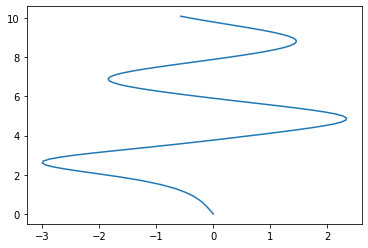

In [92]:
plt.plot(ys_a[:, 1], ts_a)

#### Решение методом Рунге-Кутты 4 порядка

In [93]:
ys_rk, ts_rk = runge_kutta4(pend, 0, 10, y0[:], 0.1, args)

#### График

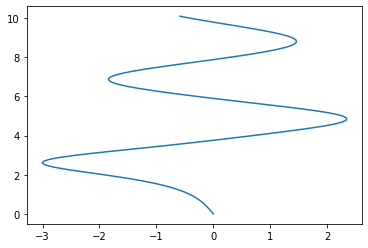

In [94]:
plt.plot(ys_rk[:, 1], ts_rk)

### Норма матрицы, представляющей собой разницу между решением методом РК4 и АБ5

In [95]:
np.linalg.norm(ys_rk-ys_a)

0.22965073078661102

### Измерение времени выполнения

#### Замер времени adams_bashford5

In [96]:
%timeit adams_bashford5(pend, 0, 10, y0[:], 0.1, args)

1.49 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Замер времени runge_kutta4

In [97]:
%timeit runge_kutta4(pend, 0, 10, y0[:], 0.1, args)

3.78 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
